In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# %config Completer.use_jedi = False

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
figure_output_directory = r'../file_outputs_from_notebooks/figures/'
data_output_directory = r'../file_outputs_from_notebooks/data/'
file_output_directory = r'../file_outputs_from_notebooks/'

# Pre-process data

## Read data

In [4]:
file_path =  r'../lohpo/resources/hp.obo'
with open(file_path, 'r', encoding = 'utf-8') as file_in:
    data = file_in.readlines()

In [5]:
data

['format-version: 1.2\n',
 'data-version: hp/releases/2021-08-02\n',
 'saved-by: Peter Robinson, Sebastian Koehler, Sandra Doelken, Chris Mungall, Melissa Haendel, Nicole Vasilevsky, Monarch Initiative, et al.\n',
 'subsetdef: hposlim_core "Core clinical terminology"\n',
 'subsetdef: secondary_consequence "Consequence of a disorder in another organ system."\n',
 'synonymtypedef: abbreviation "abbreviation"\n',
 'synonymtypedef: layperson "layperson term"\n',
 'synonymtypedef: obsolete_synonym "discarded/obsoleted synonym"\n',
 'synonymtypedef: plural_form "plural form"\n',
 'synonymtypedef: uk_spelling "UK spelling"\n',
 'default-namespace: human_phenotype\n',
 'remark: Please see license of HPO at http://www.human-phenotype-ontology.org\n',
 'ontology: hp.obo\n',
 'property_value: http://purl.org/dc/elements/1.1/creator "Human Phenotype Ontology Consortium" xsd:string\n',
 'property_value: http://purl.org/dc/elements/1.1/creator "Monarch Initiative" xsd:string\n',
 'property_value: ht

## Build data structure 

In [6]:
nodes = []
counter = 0
number_of_parents = []
while counter < len(data):
    if data[counter] != '[Term]\n':
        counter += 1
        continue
    counter += 1
    if counter == len(data) - 1:
        break

    nodes.append({})
    n = 1
    while data[counter] != '[Term]\n':
#         print(counter, data[counter])
        aux = data[counter].split(':')
        if len(aux) > 1:
            if aux[0].strip() == 'is_a':
                nodes[-1][aux[0].strip()+str(n)] = ":".join(aux[1:]).strip()
                n += 1
            else:
                nodes[-1][aux[0].strip()] = ":".join(aux[1:]).strip()

        counter += 1
        number_of_parents.append(n)
        if counter == len(data) - 1:
            break

print(f"There are {len(nodes)} nodes in file.\n\nThe last one is:\n{nodes[-1]}")

There are 16544 nodes in file.

The last one is:
{'id': 'HP:5000048', 'name': 'Anti-Kv1.4 antibody', 'def': '"The presence of autoantibodies (immunoglobulins) in the blood circulation that react against the voltage-gated potassium channel Kv1.4." [PMID:22167224, PMID:30918333]', 'is_a1': 'HP:0030057 ! Autoimmune antibody positivity', 'created_by': 'ORCID:0000-0002-3387-1836'}


## Clean parent node info

#### Review this code cell whenever newer versions of the HPO file come up

In [7]:
k = 0
for node in nodes:
    
#     print(k, node.keys())

    if 'is_a1' in node.keys():
        aux = node['is_a1'].split('!')
        node['parent_ids'] = [aux[0].strip()]
        node['parent_names'] = [aux[1].strip()]
        
    if 'is_a2' in node.keys():
        aux = node['is_a2'].split('!')
        node['parent_ids'].append(aux[0].strip())
        node['parent_names'].append(aux[1].strip())
    
    if 'is_a3' in node.keys():
        aux = node['is_a3'].split('!')
        node['parent_ids'].append(aux[0].strip())
        node['parent_names'].append(aux[1].strip())
#         print(node)

    if 'is_a4' in node.keys():
        aux = node['is_a4'].split('!')
        node['parent_ids'].append(aux[0].strip())
        node['parent_names'].append(aux[1].strip())
        
    if 'is_a5' in node.keys():
        aux = node['is_a5'].split('!')
        node['parent_ids'].append(aux[0].strip())
        node['parent_names'].append(aux[1].strip())
        
    k += 1

In [8]:
# This is to print and see
# k = 0
# for node in nodes:

#     if 'is_a2' in node.keys():
#         print(k, node.keys())

#     if 'is_a3' in node.keys():
#         aux = node['is_a3'].split('!')
#         node['parent_ids'].append(aux[0].strip())
#         node['parent_names'].append(aux[1].strip())
# #         print(node)

#     if 'is_a4' in node.keys():
#         aux = node['is_a4'].split('!')
#         node['parent_ids'].append(aux[0].strip())
#         node['parent_names'].append(aux[1].strip())
        
#     if 'is_a5' in node.keys():
#         print(k, len(node['parent_ids']))
        
#     k += 1

## Save data as list of arcs for creating DiGraph using networkx

Children point to parent. See https://networkx.org/documentation/stable/reference/classes/digraph.html for details.
Switching to parent pointing to children for layout purposes

In [9]:
all_arcs_ids = []
all_arcs_names = []

node_ids = []
node_names = []
# first_level_nodes = ['All']
# first_level_edges = []

for node in nodes:
    node_names.append(node['name'])
    node_ids.append(node['id'])
    
    if 'parent_ids' in node.keys():
        for i in range(len(node['parent_ids'])):
            all_arcs_ids.append( (node['parent_ids'][i], node['id']) )
            all_arcs_names.append( (node['parent_names'][i], node['name']) )
        
#         if node['parent_id'] == 'HP:0000001':
#             first_level_nodes.append(node['name'])
#             first_level_edges.append( (node['name'], node['parent_name']) )

print(f"There are {len(all_arcs_names)} edges in directed graph.\n\nThe first three are:\n{all_arcs_names[:3]}")
print(f"There are {len(node_names)} nodes in directed graph\n")

print(f"There are {len(all_arcs_ids)} edges in directed graph.\n\nThe first three are:\n{all_arcs_ids[:3]}")
print(f"There are {len(node_ids)} nodes in directed graph")

There are 20464 edges in directed graph.

The first three are:
[('Growth abnormality', 'Abnormality of body height'), ('Renal cyst', 'Multicystic kidney dysplasia'), ('All', 'Mode of inheritance')]
There are 16544 nodes in directed graph

There are 20464 edges in directed graph.

The first three are:
[('HP:0001507', 'HP:0000002'), ('HP:0000107', 'HP:0000003'), ('HP:0000001', 'HP:0000005')]
There are 16544 nodes in directed graph


### Let's see if the subgraph that includes terms that are being mapped by dataset is more manageable to draw

In [27]:
import json

with open(data_output_directory+'relevant_hpo_names.json', 'r') as infile:
    mapped_hpo_names = json.load(infile)

In [11]:
# This takes care of an HPO name that is obsolete in the LOINC2HPO library
mapped_hpo_names = ['Elevated total serum tryptase' if x=='obsolete Abnormal serum tryptase concentration' else x for x in mapped_hpo_names]

# Also, there are cases where the name in the library is a synonym.
# There must be a better way to deal with synonyms, but will content myself for now with doing the following.
# Well, the problem disappears as soon as I use HPO codes rather than names.
mapped_hpo_names = ['Decreased circulating dehydroepiandrosterone-sulfate concentration' if x=='Decreased circulating dehydroepiandrosterone-sulfate level' else x for x in mapped_hpo_names]

mapped_hpo_names = ['Increased circulating troponin I concentration' if x=='Increased troponin I level in blood' else x for x in mapped_hpo_names]

mapped_hpo_names = ['Increased circulating troponin T concentration' if x=='Increased troponin T level in blood' else x for x in mapped_hpo_names]

mapped_hpo_names = ['Elevated circulating alanine aminotransferase concentration' if x=='Elevated serum alanine aminotransferase' else x for x in mapped_hpo_names]

mapped_hpo_names = ['Abnormal circulating luteinizing hormone concentration' if x=='Abnormal circulating luteinizing hormone level' else x for x in mapped_hpo_names]

mapped_hpo_names = ['Abnormal circulating antimullerian hormone concentration' if x=='Abnormal antimullerian hormone level' else x for x in mapped_hpo_names]

mapped_hpo_names = ['Elevated circulating C-reactive protein concentration' if x=='Elevated C-reactive protein level' else x for x in mapped_hpo_names]

mapped_hpo_names = ['Abnormal circulating testosterone concentration' if x=='Abnormal serum testosterone level' else x for x in mapped_hpo_names]

mapped_hpo_names = ['Increased circulating procalcitonin concentration' if x=='Increased circulating procalcitonin level' else x for x in mapped_hpo_names]

mapped_hpo_names = ['Elevated circulating aspartate aminotransferase concentration' if x=='Elevated serum aspartate aminotransferase' else x for x in mapped_hpo_names]

mapped_hpo_names = ['Abnormal circulating follicle-stimulating hormone concentration' if x=='Abnormal circulating follicle-stimulating hormone level' else x for x in mapped_hpo_names]

In [12]:
G = nx.DiGraph()
G.add_nodes_from(node_names)
G.add_edges_from(all_arcs_names)

In [13]:
nodes_for_subgraph = []

for low_level_node in mapped_hpo_names:
    
    if low_level_node in node_names:
        nodes_for_subgraph.append(low_level_node)
        nodes_for_subgraph.extend(nx.descendants(G, low_level_node))
        nodes_for_subgraph.extend(nx.ancestors(G, low_level_node))        
            
    else:
        print(f"Something is wrong with the parsing of the HPO file. This term isn't present: {low_level_node}")
        continue

In [14]:
nodes_for_subgraph = list(set(nodes_for_subgraph))

In [15]:
# Removing a useless parent term
nodes_for_subgraph.remove('All')

In [16]:
# Getting the differential coloring of mapped HPO terms vs. the rest
for_coloring = {}
for_sizing = {}

for nombre in nodes_for_subgraph:
    if nombre in mapped_hpo_names:
        for_coloring[nombre] = '#377eb8'
        for_sizing[nombre] = 12
    else:
        for_coloring[nombre] = '#999999'
        for_sizing[nombre] = 8

values = [for_coloring.get(node, 0.25) for node in G.subgraph(nodes_for_subgraph).nodes()]

In [17]:
# Getting the nodes at the first level
first_level_nodes = []
for term in G.successors('Phenotypic abnormality'):
    if term in nodes_for_subgraph:
        first_level_nodes.append(term)
        
first_level_nodes

['Abnormality of the genitourinary system',
 'Abnormality of the nervous system',
 'Abnormality of the endocrine system',
 'Abnormality of the cardiovascular system',
 'Abnormality of blood and blood-forming tissues',
 'Abnormality of metabolism/homeostasis',
 'Abnormality of the respiratory system',
 'Abnormality of the immune system',
 'Abnormality of the digestive system',
 'Abnormal cellular phenotype']

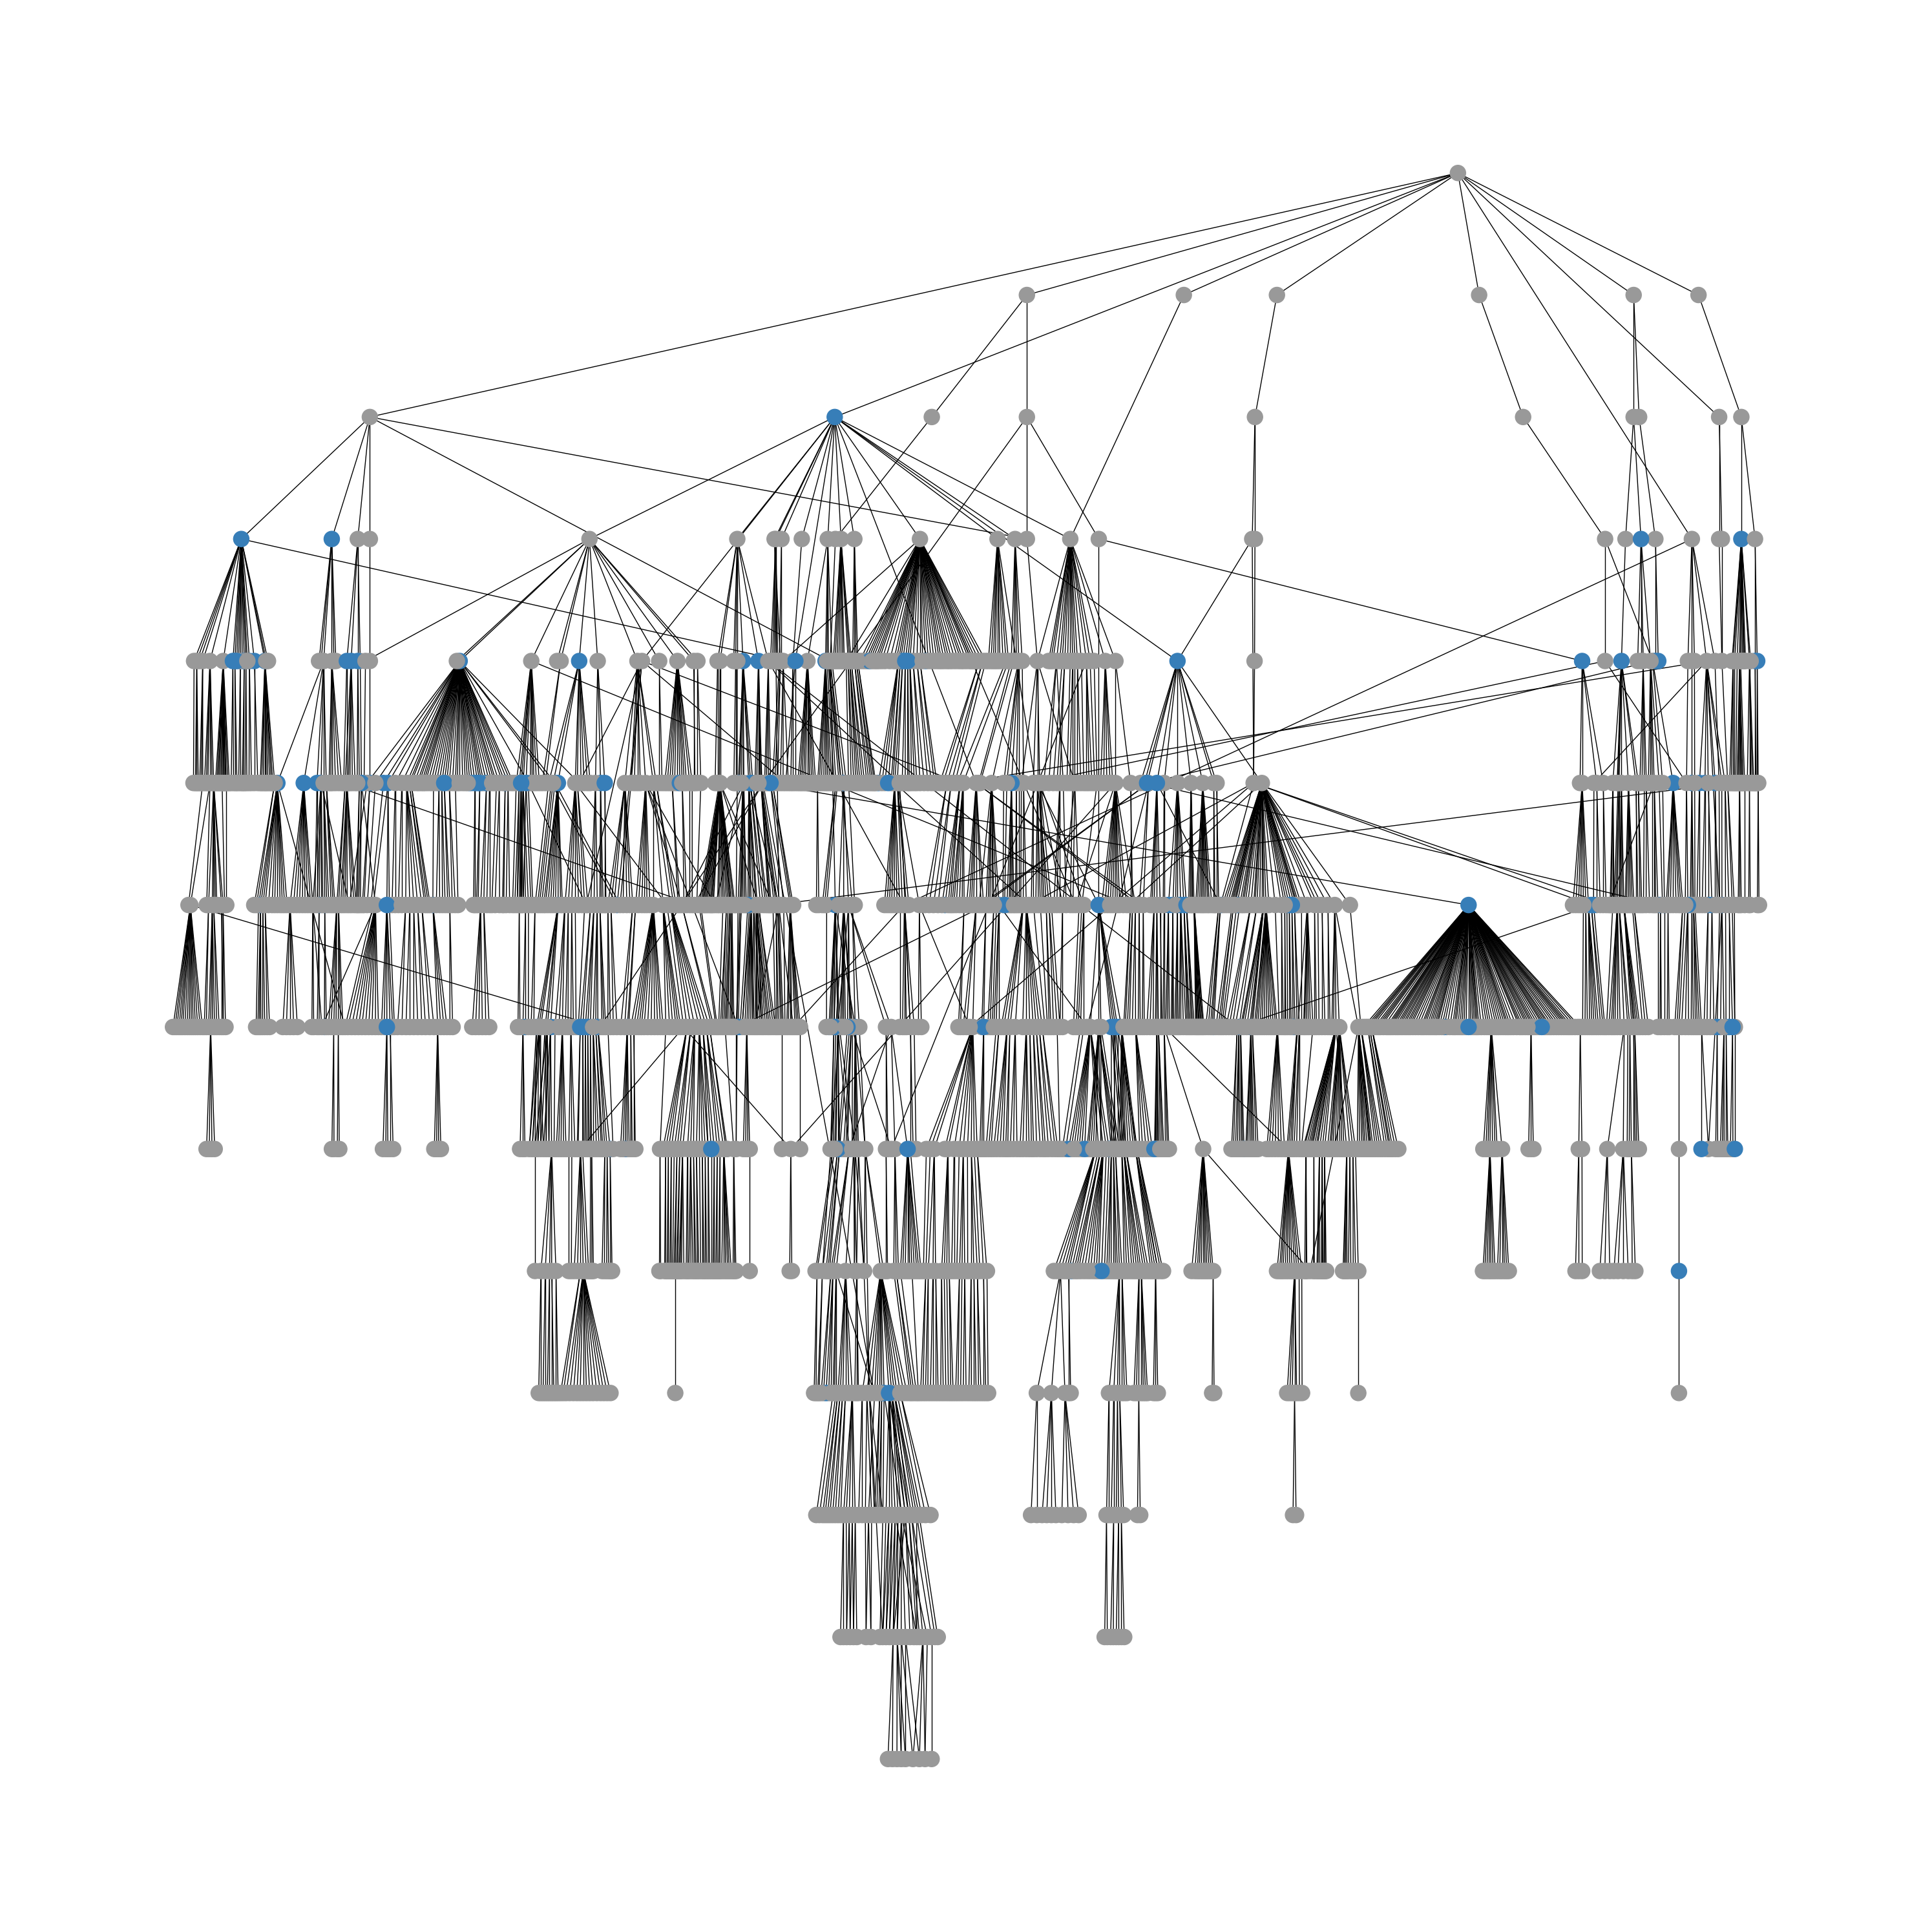

In [18]:
# I'd like a tree layout please

# layout = nx.drawing.nx_agraph.graphviz_layout(G.subgraph(nodes_for_subgraph), prog='dot')

with open(data_output_directory+'layout5.json', 'r') as infile:
    layout = json.load(infile)

mapped_hpo_tree = G.subgraph(nodes_for_subgraph).copy()

fig, ax = plt.subplots(1,1, figsize=(30,30))
nx.draw(mapped_hpo_tree, cmap=plt.get_cmap('Accent'), node_color=values,
        pos=layout, ax=ax, arrows=False, with_labels=False)

# ax1.annotate('Phenotypic abnormality',
#              xy=layout['Phenotypic abnormality'],
#              xytext = (8398.7, 666.0+50),
#              arrowprops=dict(facecolor='black', shrink=0.1),
#              horizontalalignment='center', verticalalignment='top',
#             fontsize=15)

# ax1.annotate('Of metabolism/homeostasis',
#              xy=layout['Abnormality of metabolism/homeostasis'],
#              xytext = (11499.0-10, 594.0+5),
#              fontsize=15)

# ax1.annotate('Of the genitourinary system',
#              xy=layout['Abnormality of the genitourinary system'],
#              xytext = (17063.0+100, 594.0),
#              fontsize=15)

# ax1.annotate('Of the immune system',
#              xy=layout['Abnormality of the immune system'],
#              xytext = (1615.7-2200, 594.0),
#             fontsize=15)

# ax1.annotate('Of the respiratory system',
#              xy=layout['Abnormality of the respiratory system'],
#              fontsize=15, xytext = (15099.0+10, 594.0+50),
#              arrowprops=dict(facecolor='black', shrink=0.1))

# ax1.annotate('Of the nervous system',
#              xy=layout['Abnormality of the nervous system'],
#              fontsize=15, xytext = (3528.7, 594.0+25),
#              arrowprops=dict(facecolor='black', shrink=0.1),
#              horizontalalignment='right', verticalalignment='top')

# ax1.annotate('Of the blood and blood-forming tissues',
#              xy=layout['Abnormality of blood and blood-forming tissues'],
#              fontsize=15, xytext = (6494.7, 594.0+75),
#              arrowprops=dict(facecolor='black', shrink=0.1),
#              horizontalalignment='right', verticalalignment='top')

# ax1.annotate('Of the endocrine system',
#              xy=layout['Abnormality of the endocrine system'],
#              fontsize=15, xytext = (4280.7, 594.0+50),
#              arrowprops=dict(facecolor='black', shrink=0.1),
#              horizontalalignment='right', verticalalignment='top')

# ax1.annotate('Of the digestive system',
#              xy=layout['Abnormality of the digestive system'],
#              fontsize=15, xytext = (8398.7-1000, 594.0+100),
#              arrowprops=dict(facecolor='black', shrink=0.1),
#              horizontalalignment='right', verticalalignment='top')

# ax1.annotate('Of the cardiovascular system',
#              xy=layout['Abnormality of the cardiovascular system'],
#              fontsize=15, xytext = (8783.7+1000, 594.0+100),
#              arrowprops=dict(facecolor='black', shrink=0.1),
#              horizontalalignment='left', verticalalignment='top')

# nx.draw_networkx_labels(G.subgraph(nodes_for_subgraph), layout,
#                         first_level_nodes, font_size=15)
plt.tight_layout()
plt.show()
# plt.savefig(figure_output_directory+'tree.png')

In [19]:
# with open('layout5.json', 'w') as outfile:
#     json.dump(layout, outfile)

## Interactive graph visualization with Bokeh

In [20]:
from bokeh.io import output_notebook, show, save, output_file
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, LinearColorMapper
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool)
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Spectral4

In [21]:
genitourinary = ['Abnormality of the genitourinary system'] + list(nx.descendants(mapped_hpo_tree, 'Abnormality of the genitourinary system'))
nervous = ['Abnormality of the nervous system'] + list(nx.descendants(mapped_hpo_tree, 'Abnormality of the nervous system'))
endocrine = ['Abnormality of the endocrine system'] + list(nx.descendants(mapped_hpo_tree, 'Abnormality of the endocrine system'))
cardiovascular = ['Abnormality of the cardiovascular system'] + list(nx.descendants(mapped_hpo_tree, 'Abnormality of the cardiovascular system'))
blood = ['Abnormality of blood and blood-forming tissues'] + list(nx.descendants(mapped_hpo_tree, 'Abnormality of blood and blood-forming tissues'))
homeostasis = ['Abnormality of metabolism/homeostasis'] + list(nx.descendants(mapped_hpo_tree, 'Abnormality of metabolism/homeostasis'))
respiratory = ['Abnormality of the respiratory system'] + list(nx.descendants(mapped_hpo_tree, 'Abnormality of the respiratory system'))
immune = ['Abnormality of the immune system'] + list(nx.descendants(mapped_hpo_tree, 'Abnormality of the immune system'))
digestive = ['Abnormality of the digestive system'] + list(nx.descendants(mapped_hpo_tree, 'Abnormality of the digestive system'))
cellular = ['Abnormal cellular phenotype'] + list(nx.descendants(mapped_hpo_tree, 'Abnormal cellular phenotype'))

In [22]:
for_coloring = {}
for_sizing = {}

for nombre in mapped_hpo_tree.subgraph(immune).nodes():
    if nombre in mapped_hpo_names:
        for_coloring[nombre] = '#377eb8'
        for_sizing[nombre] = 12
    else:
        for_coloring[nombre] = '#999999'
        for_sizing[nombre] = 8

values = [for_coloring.get(node, 0.25) for node in mapped_hpo_tree.subgraph(immune).nodes()]

In [23]:
nx.set_node_attributes(mapped_hpo_tree.subgraph(immune), for_coloring, 'mapped_nodes')
nx.set_node_attributes(mapped_hpo_tree.subgraph(immune), for_sizing, 'node_size')

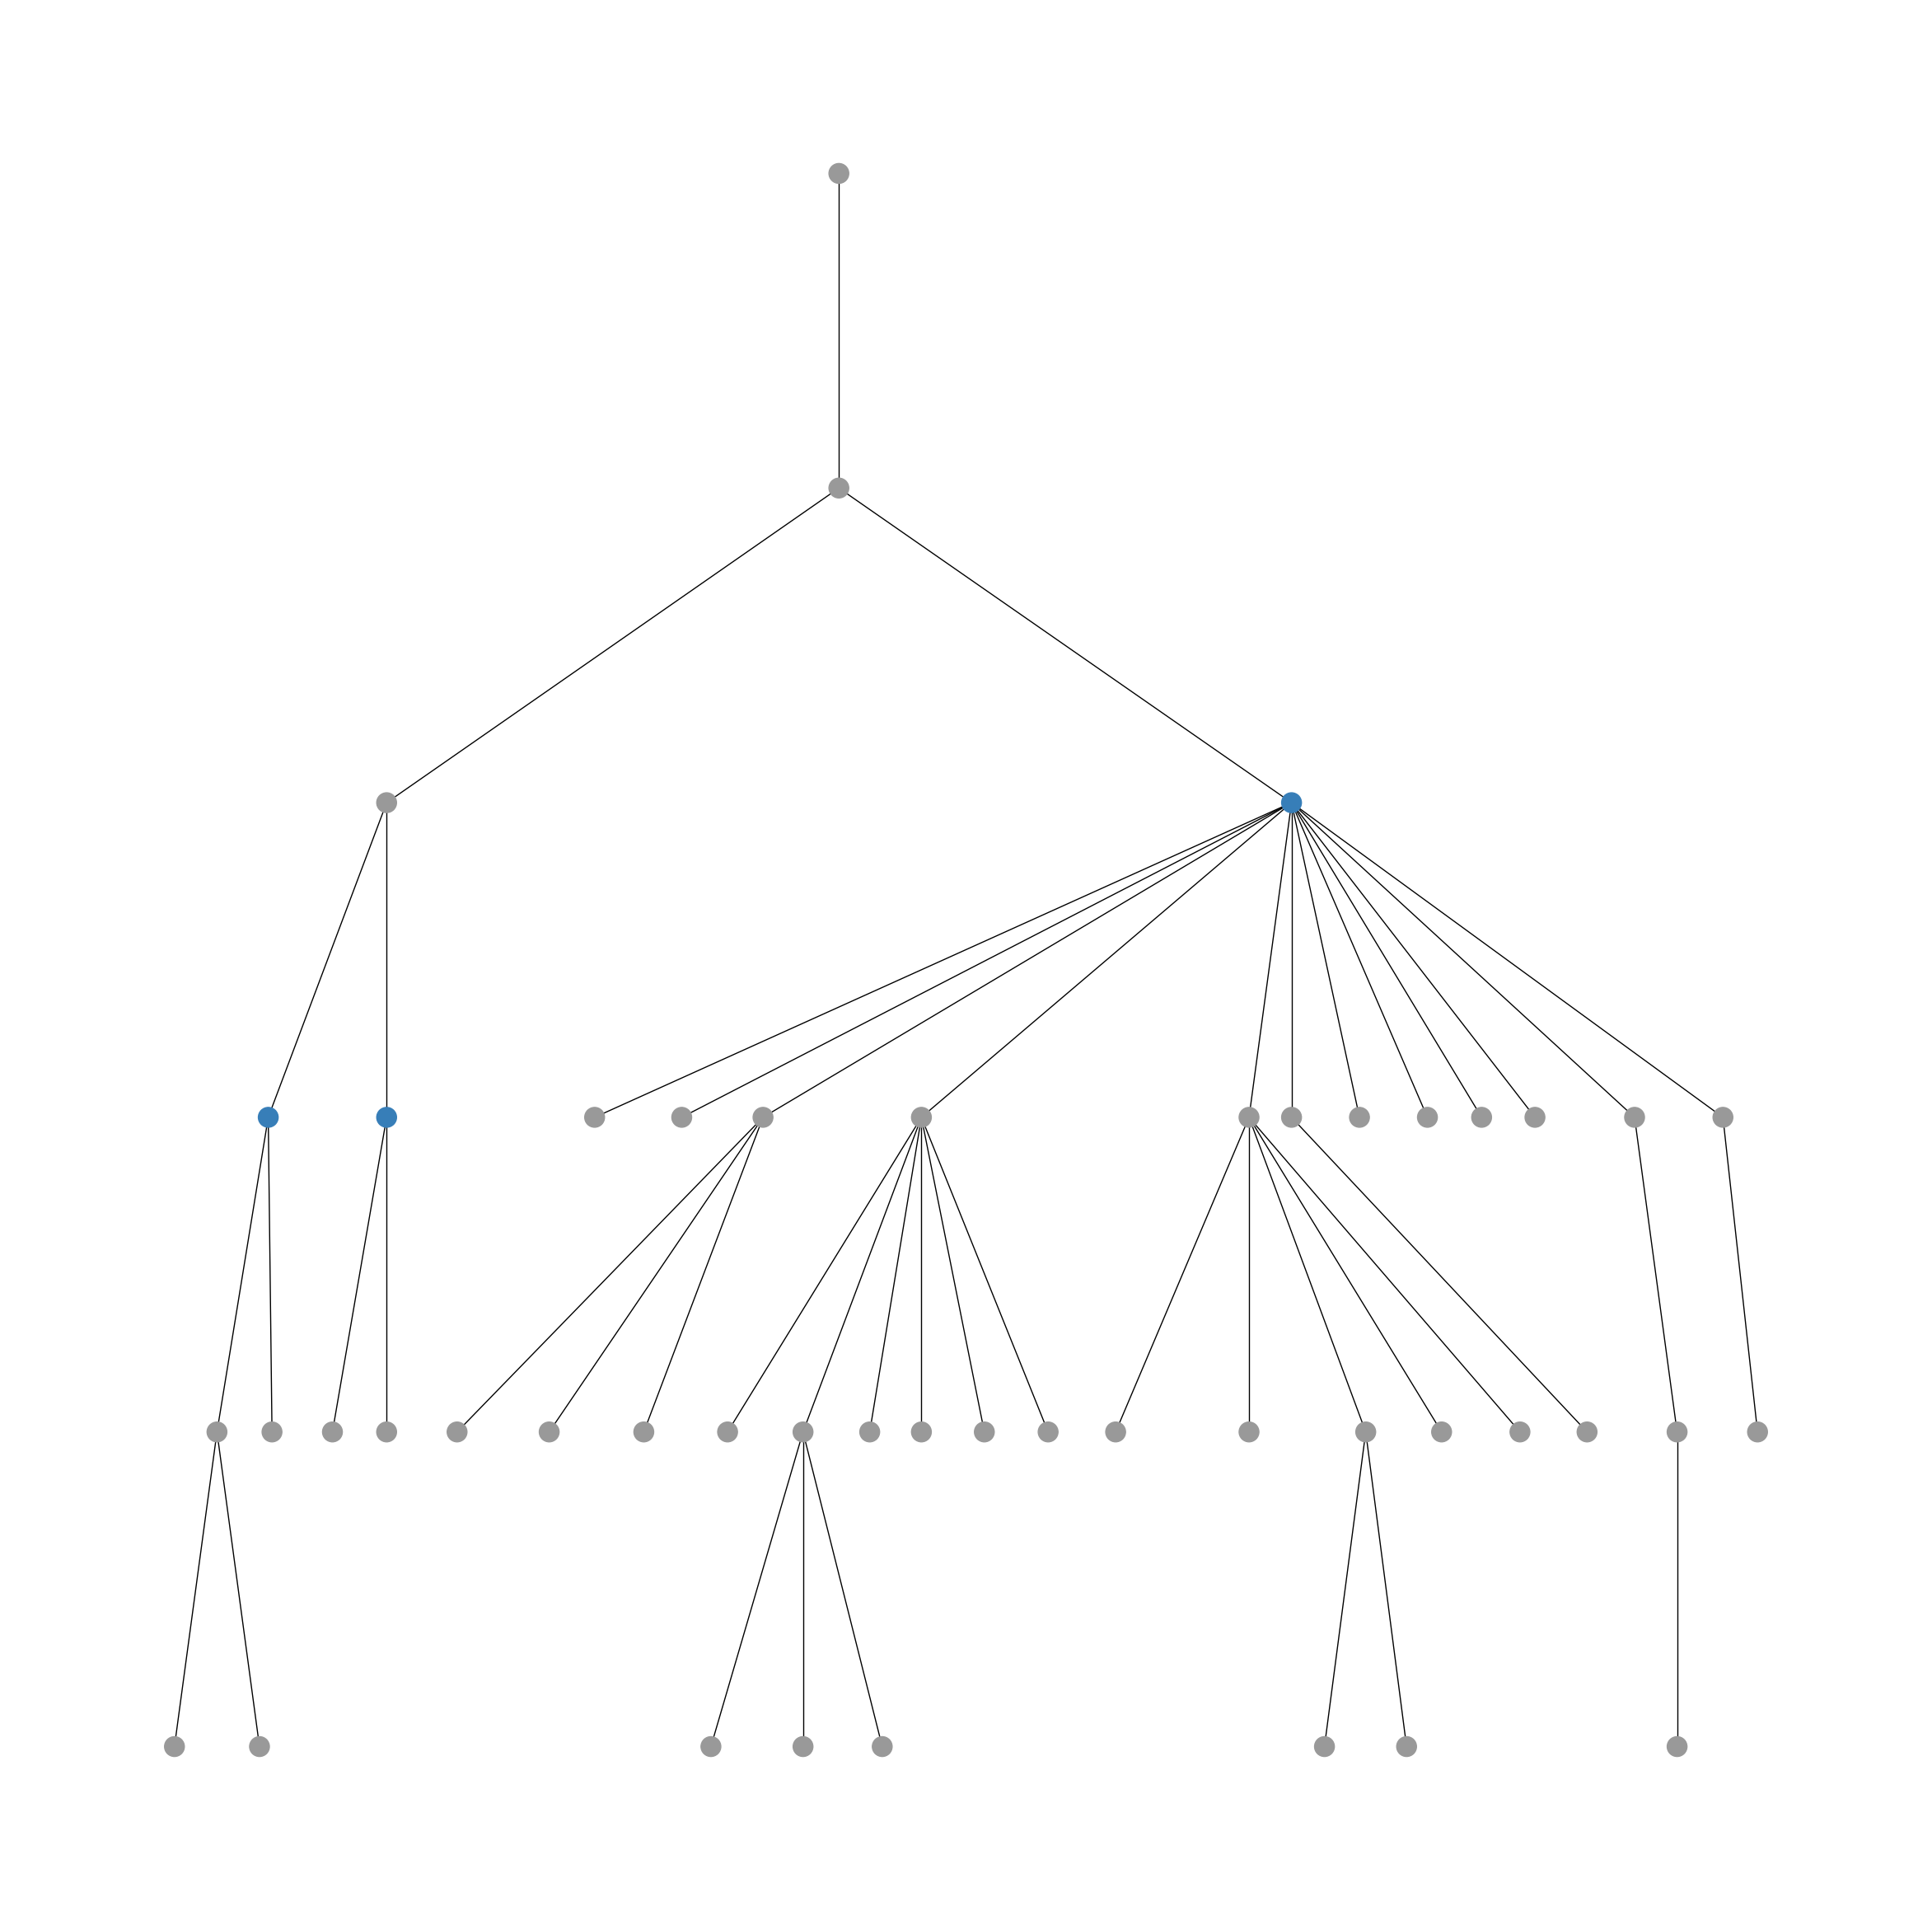

In [24]:
layout = nx.drawing.nx_agraph.graphviz_layout(mapped_hpo_tree.subgraph(immune), prog='dot')

# with open(data_output_directory+'layout_homeostasis.json', 'r') as infile:
#     layout = json.load(infile)

fig1, ax1 = plt.subplots(1,1, figsize=(30,30))
nx.draw(mapped_hpo_tree.subgraph(respiratory), cmap=plt.get_cmap('Accent'), node_color=values,
        pos=layout, ax=ax1, arrows=False, with_labels=False)

plt.show()

In [26]:
#Choose a title!
title = 'Respiratory'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("Term", "@index")]

output_file(figure_output_directory+'211026_respiratory_graph.html')

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset",
              active_scroll='wheel_zoom',
              width=2500,
              height=2500,
              title=title)

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(mapped_hpo_tree.subgraph(respiratory),
                              layout,
                              scale=100, center=(0, 0))

#Set node size and color
network_graph.node_renderer.glyph = Circle(size='node_size', fill_color='mapped_nodes')

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

show(plot)
#save(plot, filename=f"{title}.html")